In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Загрузка модели

In [19]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### выделяем target

In [24]:
y_data = train.Survived
train.drop('Survived', axis=1, inplace=True)

### Объединяем тест с трейном для обработки категориальных признаков

In [25]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [26]:
train['is_test'] = 0
test['is_test'] = 1

In [27]:
df = pd.concat([train, test])

### обработка категориальных признаков

In [28]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})

In [29]:
df.drop(['Sex', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [30]:
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [31]:
pd.get_dummies(df, columns=['Pclass', 'Embarked']);

In [32]:
df['name_len'] = df.Name.str.len()

In [33]:
df['count_words_in_name'] = df.Name.str.split().str.len()

In [34]:
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale,name_len,count_words_in_name
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,23,4
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0,51,7
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0,22,3
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0,44,7
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,24,4


In [35]:
df[:1].Name.str.split().apply(lambda x: 'Mr.' in x).astype(int)

0    1
Name: Name, dtype: int32

In [36]:
df['Mr._in_Name']= df.Name.str.split().apply(lambda x: 'Mr.' in x).astype(int)
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale,name_len,count_words_in_name,Mr._in_Name
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,23,4,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0,51,7,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0,22,3,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0,44,7,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,24,4,1


In [37]:
df['Mrs._in_Name']= df.Name.str.split().apply(lambda x: 'Mrs.' in x).astype(int)

In [38]:
df['Miss._in_Name']= df.Name.str.split().apply(lambda x: 'Miss.' in x).astype(int)

In [39]:
df['Master._in_Name']= df.Name.str.split().apply(lambda x: 'Master' in x).astype(int)

In [40]:
df.drop('Name', axis=1, inplace=True)

In [41]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [43]:
df_dummies.head(1)

,Age,SibSp,Parch,Fare,is_test,isMale,name_len,count_words_in_name,Mr._in_Name,Mrs._in_Name,Miss._in_Name,Master._in_Name,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.25,0,1,23,4,1,0,0,0,0,0,1,0,0,1


### разделяем на тестовую и обучающую выборку

In [44]:
X_train = df_dummies[df_dummies['is_test'] == 0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies['is_test'] == 1].drop('is_test', axis=1)

### обработка пропущенных значений

In [45]:
X_train.isnull().sum()

Age                    177
SibSp                    0
Parch                    0
Fare                     0
isMale                   0
name_len                 0
count_words_in_name      0
Mr._in_Name              0
Mrs._in_Name             0
Miss._in_Name            0
Master._in_Name          0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
dtype: int64

In [64]:
columns = X_train.columns
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
X_train_imp = imputer.fit_transform(X_train)
X_test_imp= imputer.transform(X_test)
X_train_imp = pd.DataFrame(X_train_imp, columns=columns)
X_test_imp = pd.DataFrame(X_test_imp, columns=columns)
X_train_imp.head()

,Age,SibSp,Parch,Fare,isMale,name_len,count_words_in_name,Mr._in_Name,Mrs._in_Name,Miss._in_Name,Master._in_Name,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0.0,7.2500,1.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,0.0,51.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,22.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,0.0,44.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,8.0500,1.0,24.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Построение модели и подбор параметров

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### построение сетки

In [60]:
depths = np.arange(1,30)
features_num = np.arange(5,15)
min_samples_leaf = np.arange(1,15)
grid = {'max_depth': depths, 'min_samples_leaf': min_samples_leaf, 'max_features': features_num}
print(grid)
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [61]:
%%time
gridsearch.fit(X_train_imp, y_train)

Wall time: 4min 21s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

### лучшие параметры

In [66]:
gridsearch.best_params_

{'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 9}

In [75]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)[:3]

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.43850, std: 0.04427, params: {'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 9},
 mean: -0.43986, std: 0.03245, params: {'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 12},
 mean: -0.44034, std: 0.05124, params: {'max_depth': 3, 'max_features': 14, 'min_samples_leaf': 3}]

In [79]:
gridsearch.best_estimator_.fit(X_train_imp, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [80]:
y_pred_proba = gridsearch.best_estimator_.predict_proba(X_test_imp)
y_pred = gridsearch.best_estimator_.predict(X_test_imp)

In [87]:
y_pred_proba[:5]

array([[0.89967638, 0.10032362],
       [0.3828125 , 0.6171875 ],
       [0.91208791, 0.08791209],
       [0.89967638, 0.10032362],
       [0.3828125 , 0.6171875 ]])

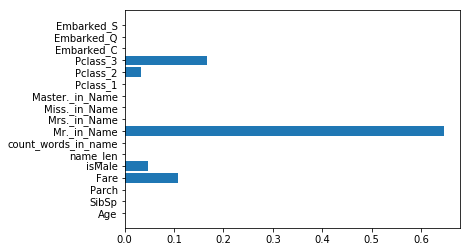

In [84]:
plt.barh(np.arange(len(gridsearch.best_estimator_.feature_importances_)), gridsearch.best_estimator_.feature_importances_)
plt.yticks(np.arange(len(X_train_imp.columns)),X_train_imp.columns);

In [85]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))
    

http://www.webgraphviz.com

In [86]:
get_tree_dot_view(gridsearch.best_estimator_, list(X_train_imp.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Mr._in_Name <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= 0.5\ngini = 0.422\nsamples = 374\nvalue = [113, 261]", fillcolor="#399de591"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="isMale <= 0.5\ngini = 0.209\nsamples = 202\nvalue = [24, 178]", fillcolor="#399de5dd"] ;
1 -> 2 ;
3 [label="gini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
2 -> 3 ;
4 [label="gini = 0.498\nsamples = 32\nvalue = [15, 17]", fillcolor="#399de51e"] ;
2 -> 4 ;
5 [label="Fare <= 23.35\ngini = 0.499\nsamples = 172\nvalue = [89, 83]", fillcolor="#e5813911"] ;
1 -> 5 ;
6 [label="gini = 0.473\nsamples = 128\nvalue = [49, 79]", fillcolor="#399de561"] ;
5 -> 6 ;
7 [label="gini = 0.165\nsamples = 44\nvalue = [40, 4]", fillcolor="#e58139e6"] ;
5 -> 7 ;
8 [label="Pclass_3 <= 0.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]", fillcolor="#

### accuracy_score

In [89]:
gender_submission = pd.read_csv('data/gender_submission.csv')

In [91]:
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [96]:
from sklearn.metrics import accuracy_score
accuracy_score_dtc = accuracy_score(gender_submission['Survived'], y_pred)
print(f'Accuracy score (DecisionTreeClassifier) = {accuracy_score_dtc}')

Accuracy score (DecisionTreeClassifier) = 0.9354066985645934


In [105]:
submit = pd.DataFrame(y_pred, columns=gender_submission.columns[1:])
submit['PassengerId'] = gender_submission.PassengerId
submit = submit[[submit.columns[-1]]+list(submit.columns[:-1])]
submit.head()
submit.to_csv('submit.csv', index=False)